## Processing valid data

In [1]:
### autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
### setting up the system path
import sys
sys.path.append('../')

In [3]:
### importing the functions from the src files
from src.basic.essential import load_data, get_nan_duplicates_shape, get_info, drop_cols, save_data
from src.processing.process_categorical import get_nunique_value_counts, apply_label_encoding, nunique_value_counts_compare
from src.processing.track_nan import track_nan
from src.processing.plot_numericals import plot_graphs, plot_graphs_post_operations
from src.processing.transform_scale import scale_valid

In [4]:
### setting up the data path
valid_path = '../data/split_global/valid.csv'

In [5]:
### loading the data
valid = load_data(valid_path)
valid.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,NEAR BAY
1,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,INLAND
2,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,<1H OCEAN
3,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,<1H OCEAN
4,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,<1H OCEAN


In [6]:
### making up the copy for the comparison purpose
valid_copy = valid.copy()
valid_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,NEAR BAY
1,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,INLAND
2,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,<1H OCEAN
3,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,<1H OCEAN
4,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,<1H OCEAN


In [7]:
### performing the initial checks on the valid data
get_nan_duplicates_shape(valid)

shape : (5160, 9) 
duplicates : 0 
Nan values : 
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        49
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64


In [8]:
### getting the info
get_info(valid)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5160 non-null   float64
 1   latitude            5160 non-null   float64
 2   housing_median_age  5160 non-null   float64
 3   total_rooms         5160 non-null   float64
 4   total_bedrooms      5111 non-null   float64
 5   population          5160 non-null   float64
 6   households          5160 non-null   float64
 7   median_income       5160 non-null   float64
 8   ocean_proximity     5160 non-null   object 
dtypes: float64(8), object(1)
memory usage: 362.9+ KB


In [9]:
### there are onlyb 49 nan values in the 'total_bedrooms' so fixing them out with the mode
valid['total_bedrooms'] = valid['total_bedrooms'].fillna(valid['total_bedrooms'].mode()[0])

In [10]:
### checking up the nan after the fix
track_nan(valid, valid_copy)

,after_fix,before_fix
longitude,0,0
latitude,0,0
housing_median_age,0,0
total_rooms,0,0
total_bedrooms,0,49
population,0,0
households,0,0
median_income,0,0
ocean_proximity,0,0


In [11]:
### processing the 'ocean_proximity' column
get_nunique_value_counts(valid, 'ocean_proximity')

(4,
 ocean_proximity
 <1H OCEAN     2276
 INLAND        1657
 NEAR OCEAN     691
 NEAR BAY       536
 Name: count, dtype: int64)

In [12]:
### applying the same labels from the train data
labels_ocean_proximity = {
'<1H OCEAN' : 1,
'INLAND' : 0,
'NEAR OCEAN' : 3,
'NEAR BAY' : 2,
}

In [13]:
### applying the labels
apply_label_encoding(valid, 'ocean_proximity', labels_ocean_proximity)
valid.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,2
1,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,0
2,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,1
3,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,1
4,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,1


In [14]:
### checking the values pre and post labelling
nunique_value_counts_compare(valid, valid_copy, 'ocean_proximity')

before : 
No. of categories : 4 
value_counts : 
ocean_proximity
<1H OCEAN     2276
INLAND        1657
NEAR OCEAN     691
NEAR BAY       536
Name: count, dtype: int64
after : 
No. of categories : 4 
value_counts : 
ocean_proximity
1    2276
0    1657
3     691
2     536
Name: count, dtype: int64


##### ***************** valid tree *****************

column : longitude


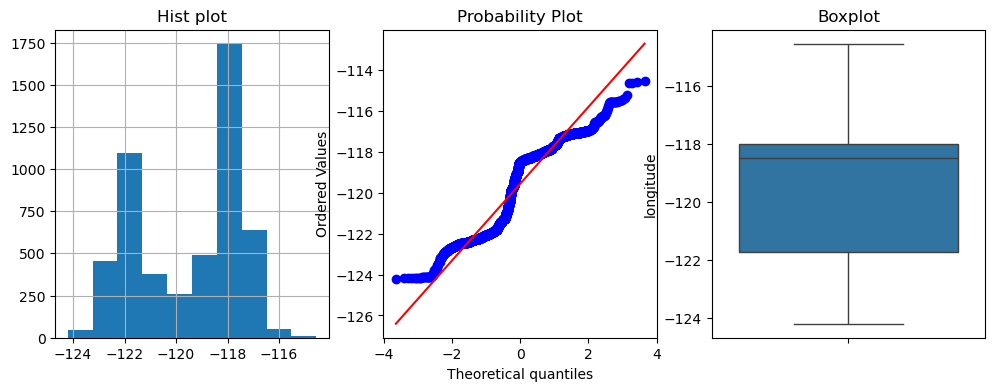

column : latitude


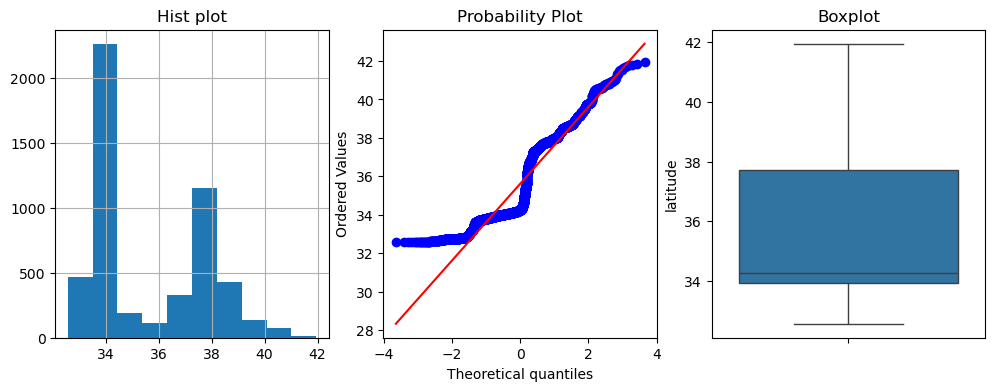

column : housing_median_age


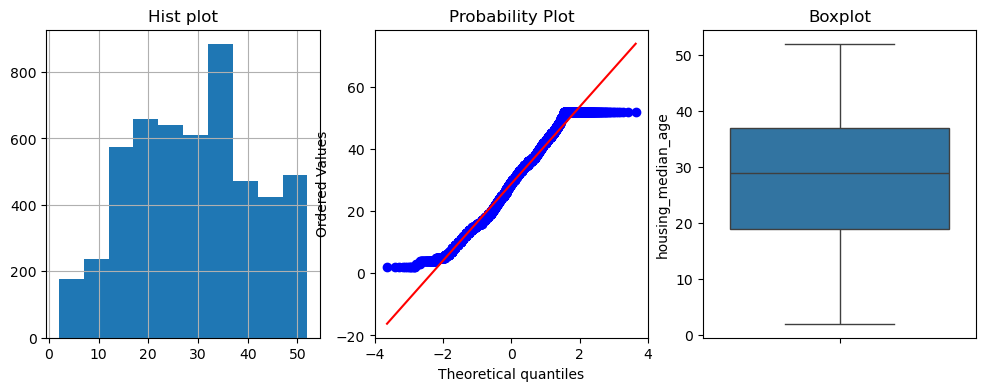

column : total_rooms


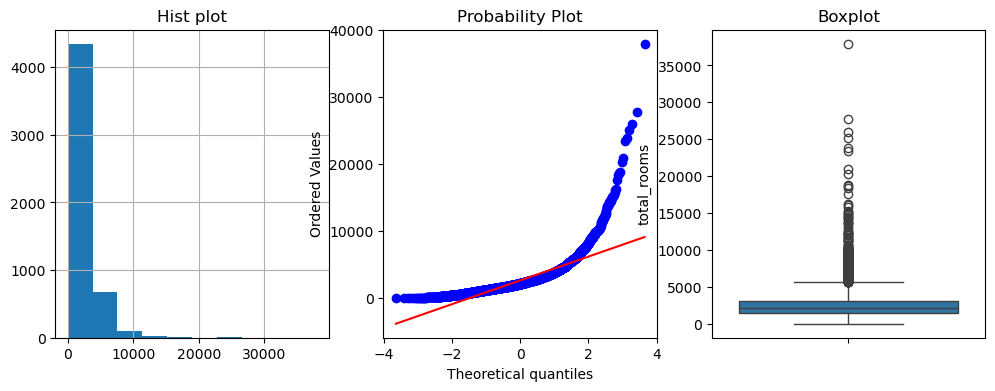

column : total_bedrooms


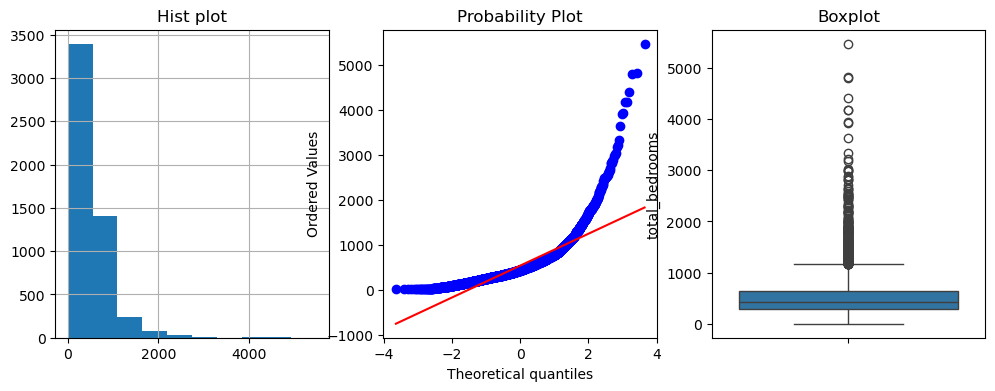

column : population


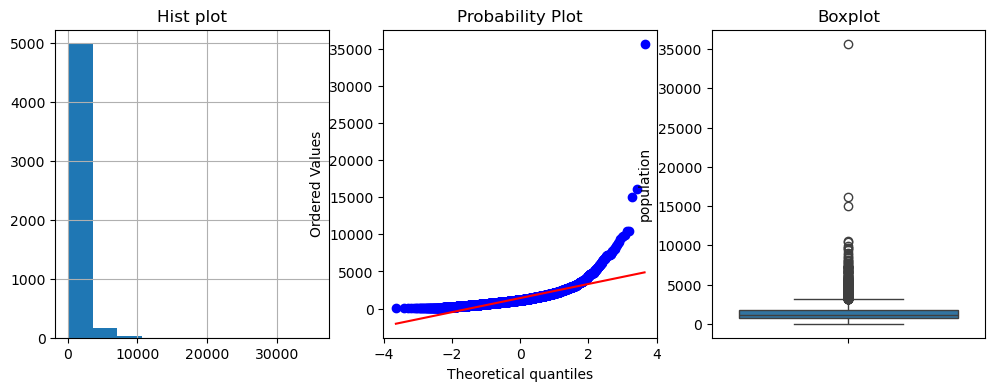

column : households


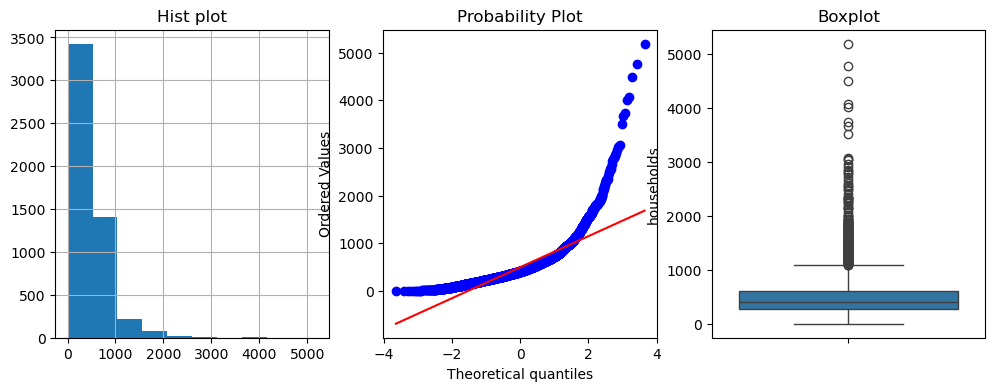

column : median_income


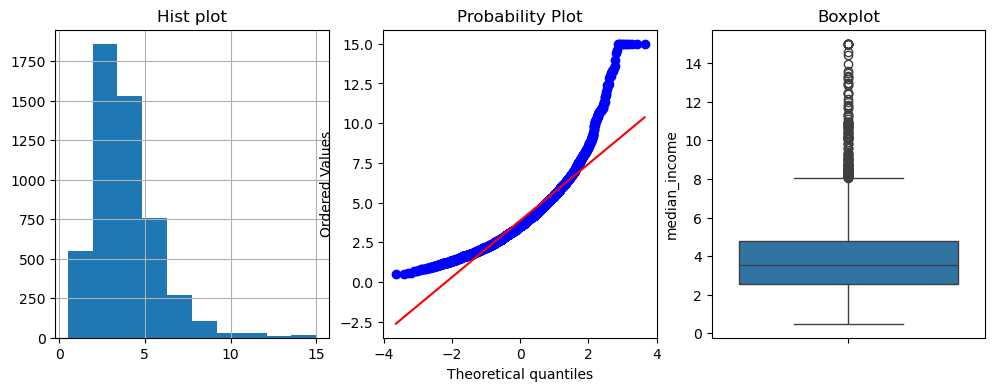

In [15]:
### plotting the graphs for the numerical features
plot_graphs(valid)

In [16]:
### making a copy and saving it as the valid_tree
valid_tree = valid.copy()
valid_tree.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,2
1,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,0
2,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,1
3,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,1
4,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,1


In [17]:
### setting up the path
valid_tree_path = '../data/model_ready/valid_tree.csv'

In [18]:
### saving the data
save_data(valid_tree, valid_tree_path)

In [19]:
### checking up on the saved data
valid_tree = load_data(valid_tree_path)
valid_tree.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,2
1,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,0
2,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,1
3,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,1
4,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,1


In [44]:
### get nan and other info
get_nan_duplicates_shape(valid_tree)

shape : (5160, 9) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


##### *************** valid distance ******************

In [20]:
### for the valid_distance data, we don't apply the transformation/outliers
### we only scale the data

In [35]:
valid_distance = valid.copy()
valid_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,2
1,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,0
2,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,1
3,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,1
4,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,1


column : longitude


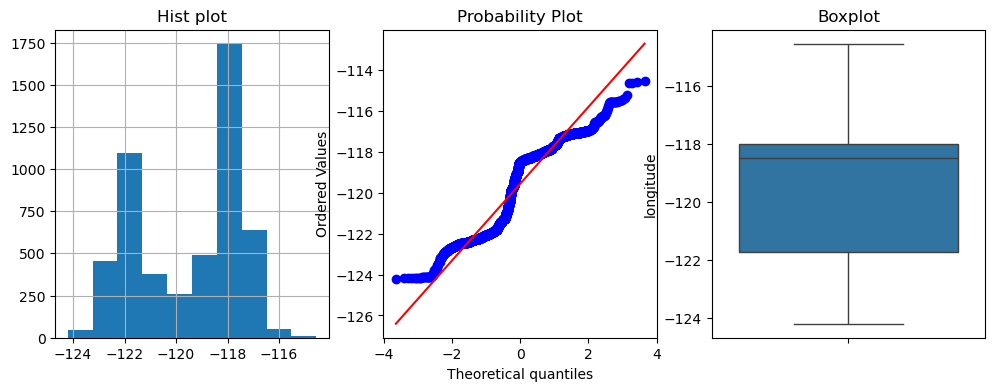

column : latitude


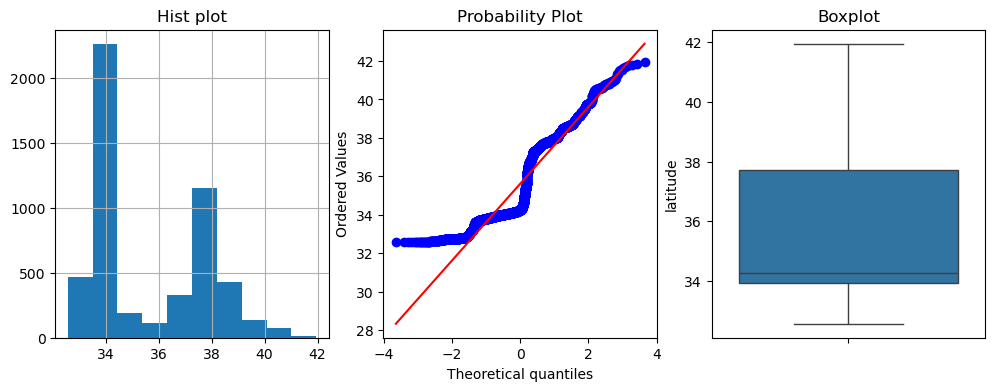

column : housing_median_age


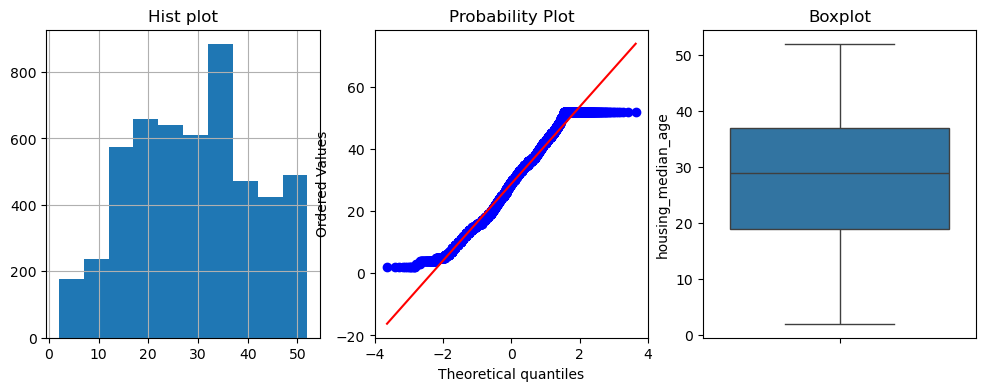

column : total_rooms


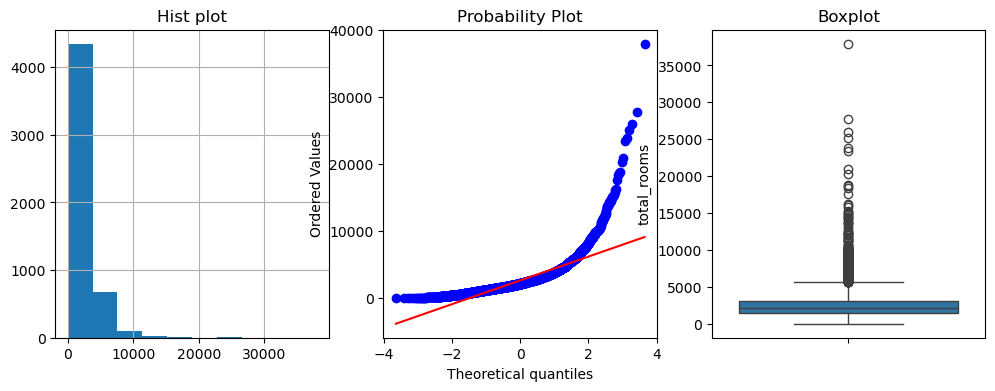

column : total_bedrooms


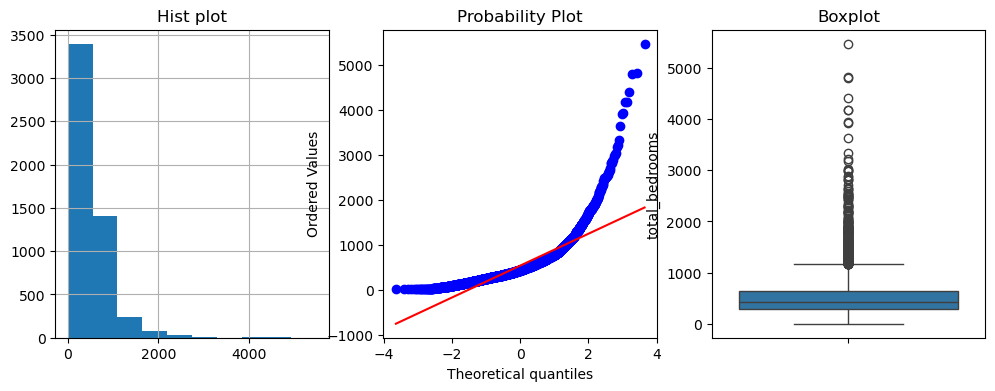

column : population


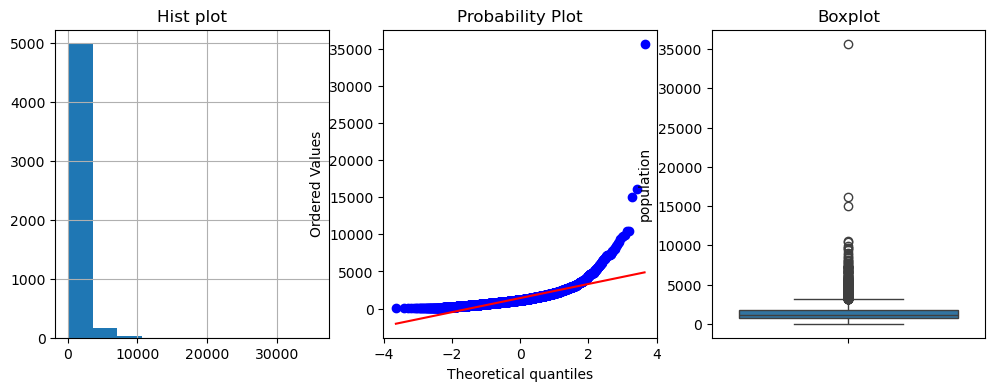

column : households


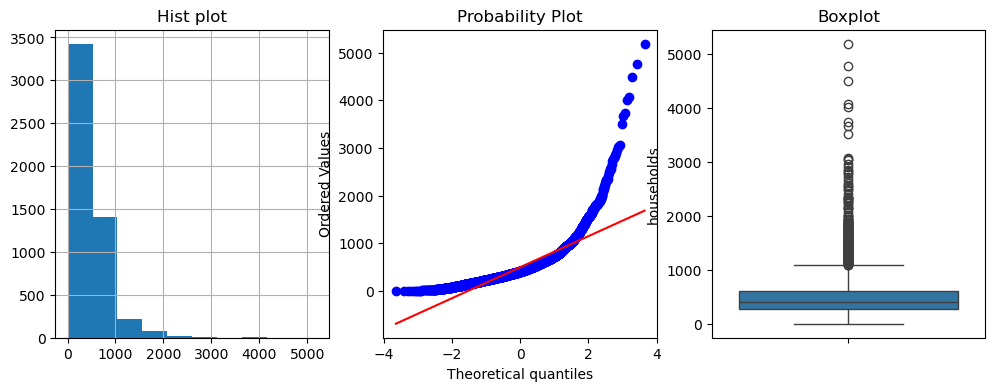

column : median_income


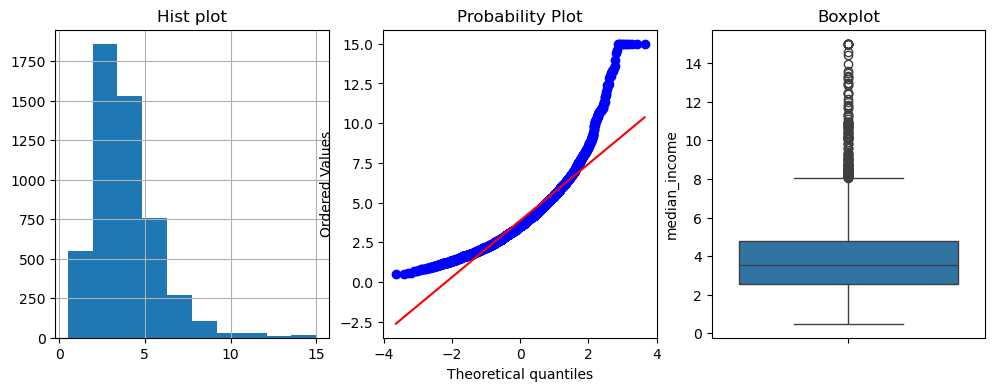

In [36]:
### plotting the features
plot_graphs(valid_distance)

In [32]:
### scaler path to load the scaler
scaler_for_rest = '../scalers/rest_scaler.pkl'

In [37]:
### columns to scale
cols_to_scale = valid_distance.select_dtypes(include = 'float64').columns
cols_to_scale

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [38]:
### scaling the data
scale_valid(valid_distance, cols_to_scale, scaler_path = scaler_for_rest)
valid_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.186335,0.586794,0.36,0.119218,0.128932,0.050542,0.134593,0.382298,2
1,0.439959,0.678381,0.40,0.071621,0.115033,0.033807,0.092557,0.160694,0
2,0.560041,0.182109,0.20,0.087416,0.109181,0.043955,0.112032,0.289555,1
3,0.655280,0.126731,0.64,0.078820,0.122531,0.153281,0.122831,0.160984,1
4,0.663561,0.137380,0.28,0.109066,0.115947,0.043422,0.115889,0.365933,1


column : longitude


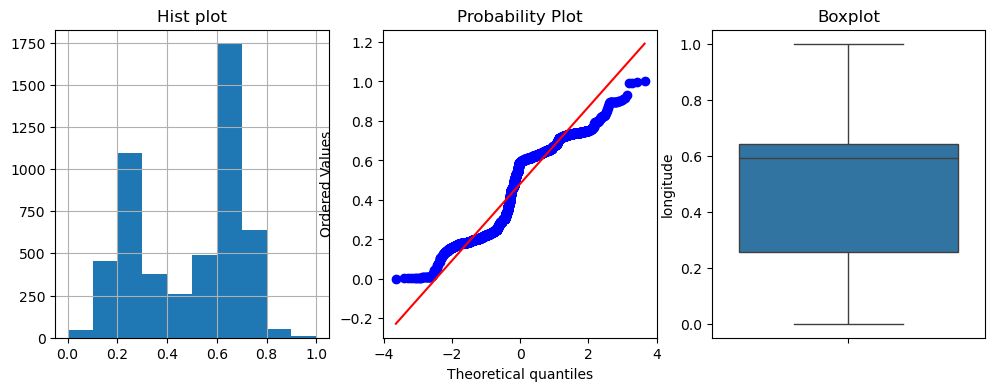

column : latitude


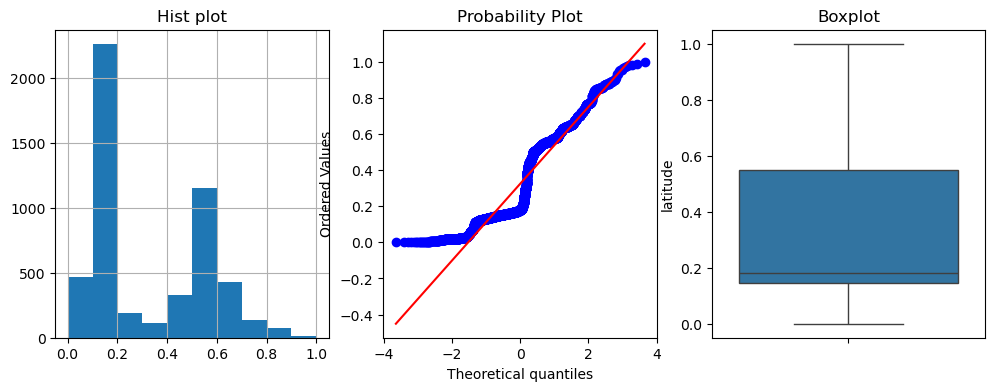

column : housing_median_age


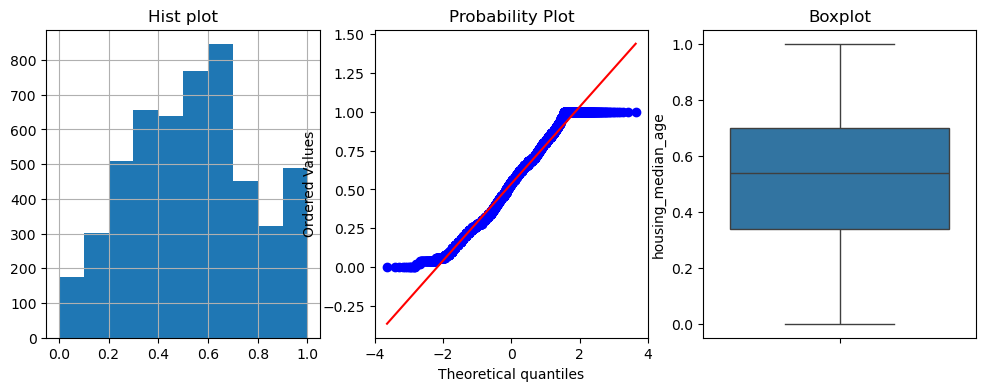

column : total_rooms


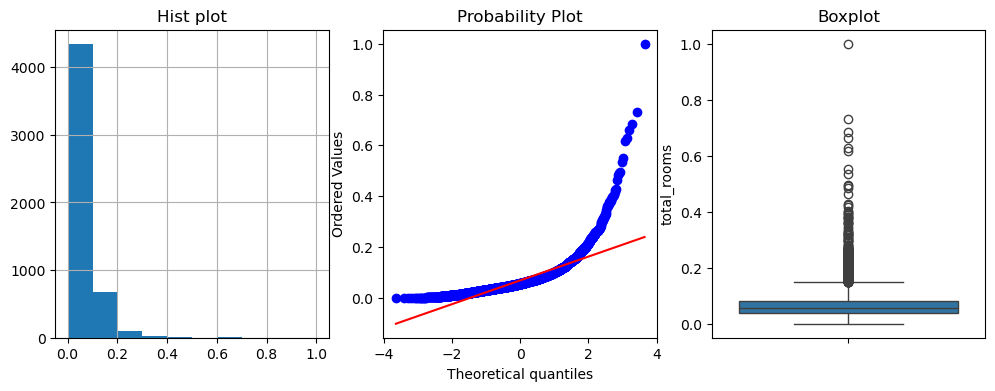

column : total_bedrooms


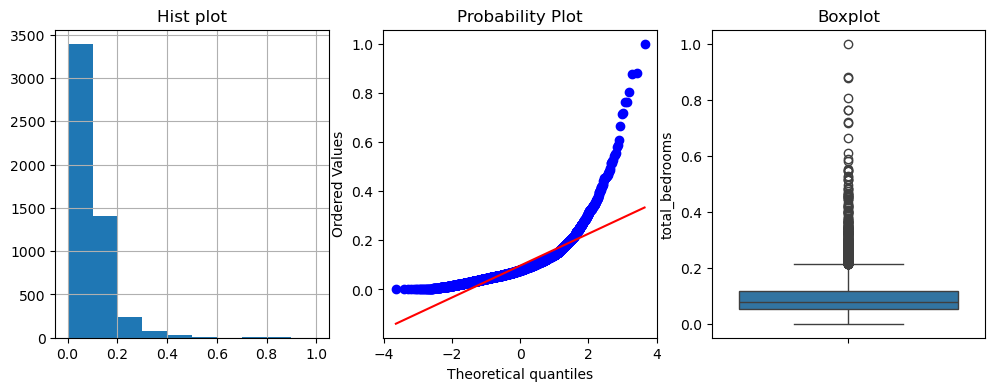

column : population


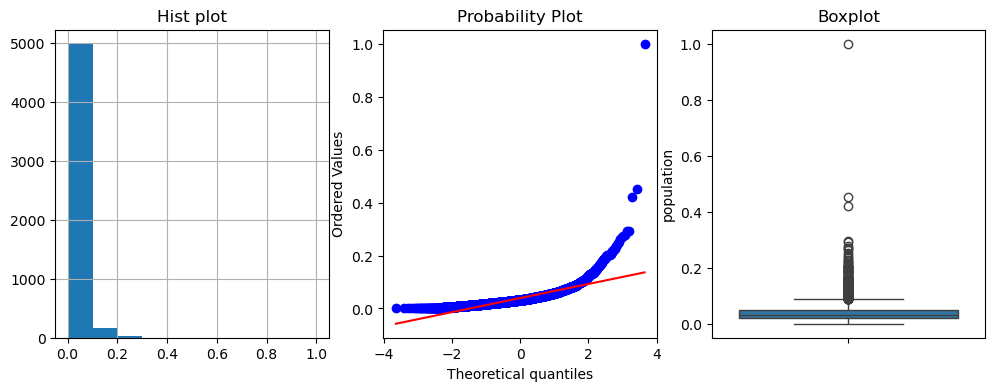

column : households


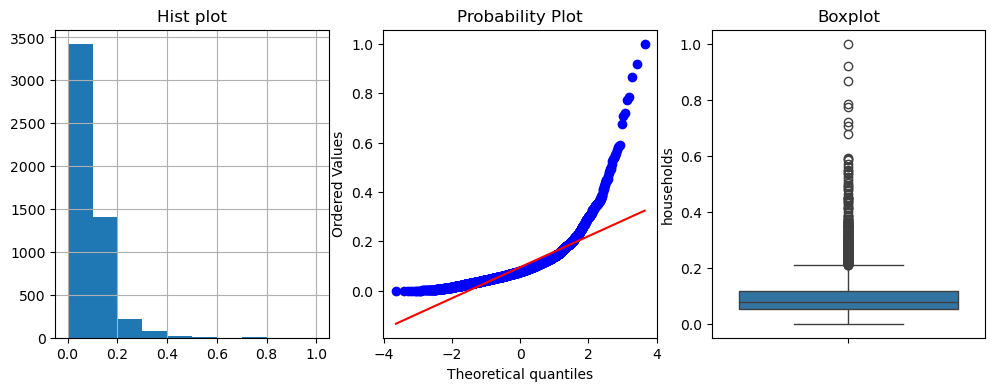

column : median_income


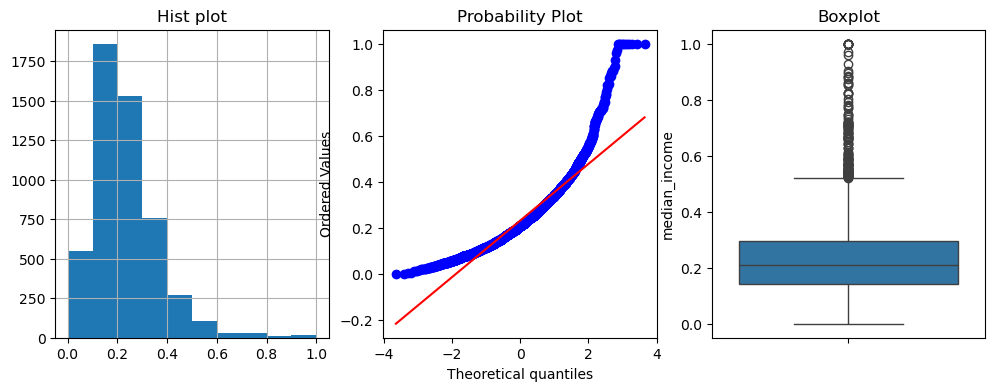

In [39]:
### plotting the feature post scaling
plot_graphs(valid_distance)

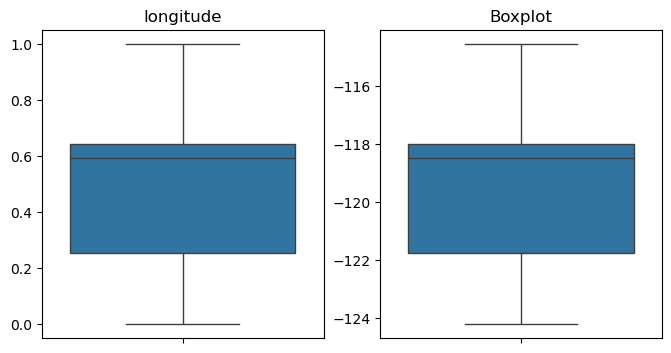

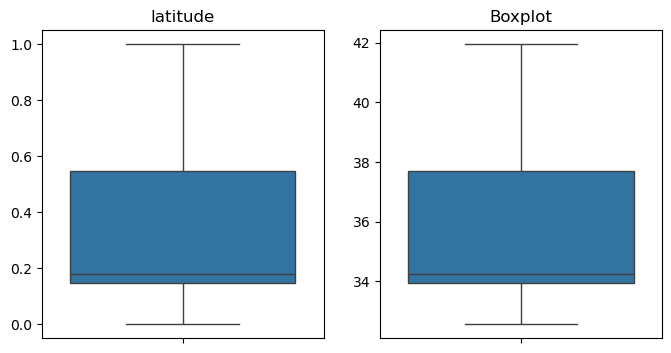

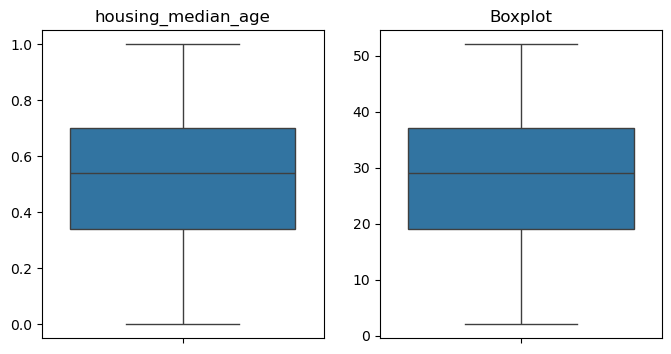

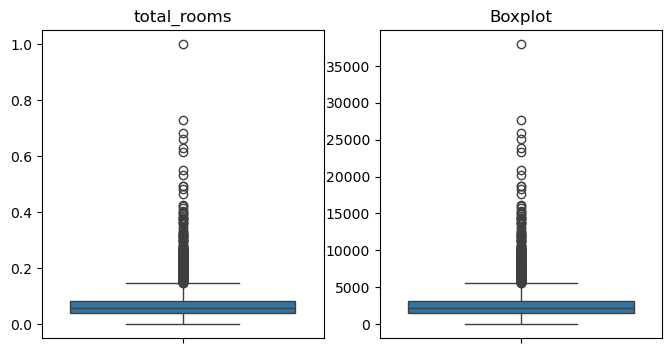

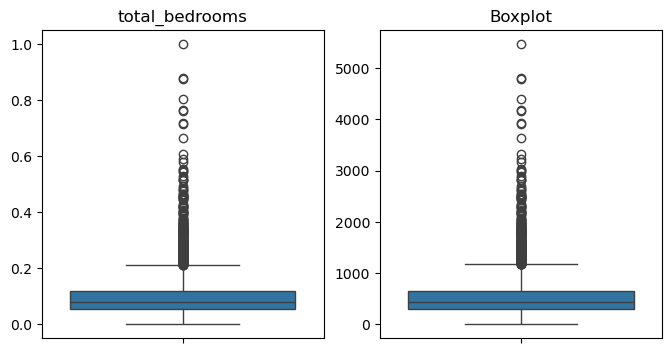

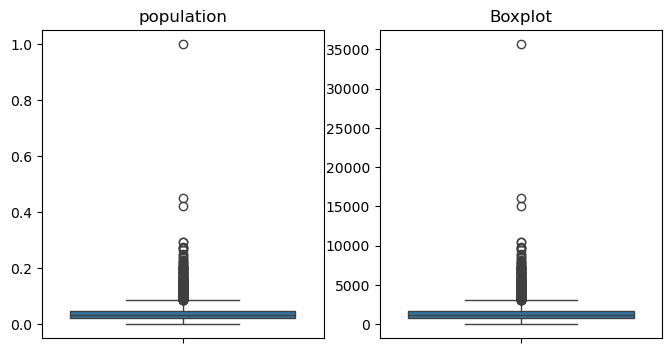

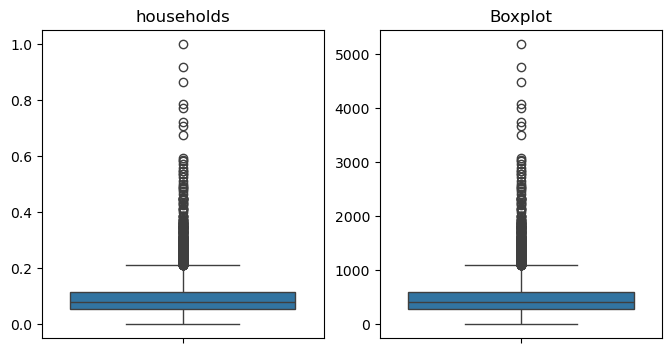

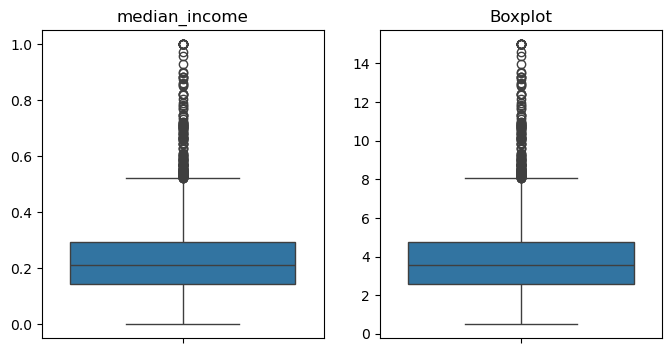

In [40]:
### comparing the feature pre and post scaling
plot_graphs_post_operations(valid_distance, valid_copy)

In [41]:
### setting up the path to save it
valid_distance_path = '../data/model_ready/valid_distance.csv'

In [42]:
### saving the data
save_data(valid_distance, valid_distance_path)

In [43]:
### checking up on the save data
valid_distance = load_data(valid_distance_path)
valid_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.186335,0.586794,0.36,0.119218,0.128932,0.050542,0.134593,0.382298,2
1,0.439959,0.678381,0.40,0.071621,0.115033,0.033807,0.092557,0.160694,0
2,0.560041,0.182109,0.20,0.087416,0.109181,0.043955,0.112032,0.289555,1
3,0.655280,0.126731,0.64,0.078820,0.122531,0.153281,0.122831,0.160984,1
4,0.663561,0.137380,0.28,0.109066,0.115947,0.043422,0.115889,0.365933,1


In [45]:
### get nan and other things
get_nan_duplicates_shape(valid_distance)

shape : (5160, 9) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64
